**[Deep Learning Home Page](https://www.kaggle.com/learn/deep-learning)**

---


In this exercise, you'll make your first submission to the [**Petals to the Metal**](https://www.kaggle.com/c/tpu-getting-started) competition.  You'll learn how to accept the competition rules, run a notebook on Kaggle that uses (free!) TPUs, and how to submit your results to the leaderboard.

We won't cover the code in detail here, but if you'd like to dive into the details, you're encouraged to check out the [tutorial notebook](https://www.kaggle.com/ryanholbrook/create-your-first-submission).

Begin by running the next code cell to set up the notebook.

In [1]:
!pip install -U -t /kaggle/working/ git+https://github.com/Kaggle/learntools.git
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.ex_tpu import *
step_1.check()

  Cloning https://github.com/Kaggle/learntools.git to /tmp/pip-req-build-wyzoghs4
  Running command git clone -q https://github.com/Kaggle/learntools.git /tmp/pip-req-build-wyzoghs4
  Created wheel for learntools: filename=learntools-0.3.4-py3-none-any.whl size=198814 sha256=bf35b6f331071ee028f0cd1bcbcb2ac020e9518cfd0a04fb582a9533432fb387
  Stored in directory: /tmp/pip-ephem-wheel-cache-pogrximk/wheels/dd/d7/6b/0fc758f52767fd281d6dceded6757c6cb5bb90ccd2dbb1de9f
Successfully built learntools


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Setup complete.</span>

If the code cell returns `Setup complete.`, then you're ready to continue.

# Commit your Notebook #

**Committing** your notebook will run a fresh copy of the notebook start to finish, saving a copy of the `submission.csv` file as output.

First, click on the **Save Version** button in the upper right.

<figure>
<img src="https://i.imgur.com/ebMUMSq.png" alt="The blue Save Version button." width=300>
</figure>

Choose **Advanced Settings**.

<figure>
<img src="https://i.imgur.com/sx9l1fL.png" alt="Advanced Settings in the Version menu." width=600>
</figure>

Select **Run with TPU for this session** from the dropdown menu and click the blue **Save** button.

<figure>
<img src="https://i.imgur.com/1cB5ykf.png" alt="The Accelerator dropdown menu." width=600>
</figure>

Select **Save & Run All (Commit)** and click the blue **Save** button.

<figure>
<img src="https://i.imgur.com/YeJLsNG.png" alt="The Save Version menu." width=600>
</figure>

The commit may take a while to finish (about 10-15 min), but there's no harm in doing something else while it's running and coming back later.

This generates a window in the bottom left corner of the notebook. After it has finished running, click on the number to the right of the **Save Version** button. This pulls up a list of versions on the right of the screen. Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**. This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.

# Make a Submission #

Now you're ready to make a submission! Click on the **Output** heading in the menu to the right of the notebook.

<figure>
<img src="https://i.imgur.com/thKwt1q.png" alt="The Output heading." width=300>
</figure>

And finally you'll submit the predictions! Just look for the blue **Submit** button. After clicking it, you should shortly be on the leaderboard!

<figure>
<img src="https://i.imgur.com/j00mDeI.png" alt="The Save Version menu." width=600>
</figure>



# Code #

The code reproduces the code we covered together in **[the tutorial](https://www.kaggle.com/ryanholbrook/create-your-first-submission)**.  If you commit the notebook by following the instructions above, then the code is run for you.

## Load Helper Functions ##

In [2]:
from petal_helper import *

Tensorflow version 2.2.0
Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8
Dataset: 12753 training images, 3712 validation images, 7382 unlabeled test images


## Create Distribution Strategy ##

In [3]:
# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


## Loading the Competition Data ##

In [4]:
ds_train = get_training_dataset()
ds_valid = get_validation_dataset()
ds_test = get_test_dataset()

print("Training:", ds_train)
print ("Validation:", ds_valid)
print("Test:", ds_test)

Training: <PrefetchDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.int32)>
Validation: <PrefetchDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.int32)>
Test: <PrefetchDataset shapes: ((None, 512, 512, 3), (None,)), types: (tf.float32, tf.string)>


## Explore the Data ##

Try using some of the helper functions described in the **Getting Started** tutorial to explore the dataset.

In [5]:
print("Number of classes: {}".format(len(CLASSES)))

print("First five classes, sorted alphabetically:")
for name in sorted(CLASSES)[:5]:
    print(name)

print ("Number of training images: {}".format(NUM_TRAINING_IMAGES))

Number of classes: 104
First five classes, sorted alphabetically:
alpine sea holly
anthurium
artichoke
azalea
balloon flower
Number of training images: 12753


Examine the shape of the data.

In [6]:
print("Training data shapes:")
for image, label in ds_train.take(3):
    print(image.numpy().shape, label.numpy().shape)
print("Training data label examples:", label.numpy())

Training data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Training data label examples: [ 0  5 79 ... 53 49  5]


In [7]:
print("Test data shapes:")
for image, idnum in ds_test.take(3):
    print(image.numpy().shape, idnum.numpy().shape)
print("Test data IDs:", idnum.numpy().astype('U')) # U=unicode string

Test data shapes:
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
(128, 512, 512, 3) (128,)
Test data IDs: ['b87e16bc0' 'd8437a7f7' '981396649' ... '15cb0c24a' '1c3a7bc99' 'b20b97998']


Peek at training data.

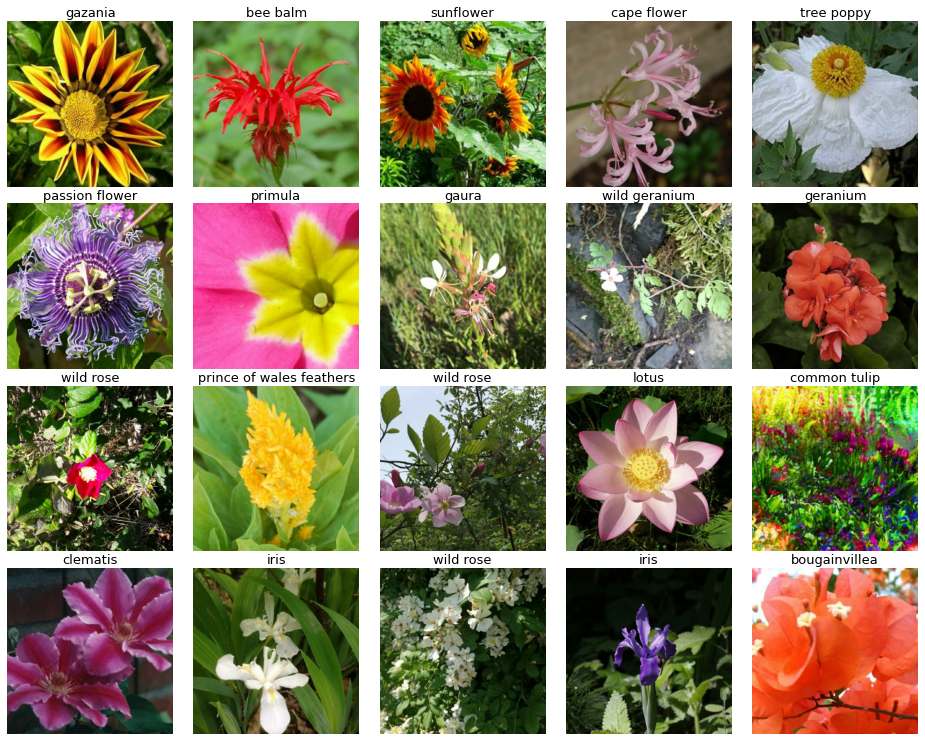

In [8]:
one_batch = next(iter(ds_train.unbatch().batch(20)))
display_batch_of_images(one_batch)

## Define Model #

In [9]:
with strategy.scope():
    pretrained_model = tf.keras.applications.VGG16(
        weights='imagenet',
        include_top=False ,
        input_shape=[*IMAGE_SIZE, 3]
    )
    pretrained_model.trainable = False
    
    model = tf.keras.Sequential([
        # To a base pretrained on ImageNet to extract features from images...
        pretrained_model,
        # ... attach a new head to act as a classifier.
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(CLASSES), activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'],
    )

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 104)               53352     
Total params: 14,768,040
Trainable params: 53,352
Non-trainable params: 14,714,688
_________________________________________________________________


## Train Model ##

In [10]:
# Define the batch size. This will be 16 with TPU off and 128 with TPU on
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

# Define training epochs for committing/submitting. (TPU on)
EPOCHS = 12
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
)

Epoch 1/12
99/99 [==============================] - 26s 267ms/step - sparse_categorical_accuracy: 0.0756 - loss: 4.1504 - val_sparse_categorical_accuracy: 0.1307 - val_loss: 3.9039
Epoch 2/12
99/99 [==============================] - 18s 181ms/step - sparse_categorical_accuracy: 0.1676 - loss: 3.7772 - val_sparse_categorical_accuracy: 0.1985 - val_loss: 3.6565
Epoch 3/12
99/99 [==============================] - 17s 175ms/step - sparse_categorical_accuracy: 0.2061 - loss: 3.5558 - val_sparse_categorical_accuracy: 0.2309 - val_loss: 3.4647
Epoch 4/12
99/99 [==============================] - 17s 168ms/step - sparse_categorical_accuracy: 0.2427 - loss: 3.3726 - val_sparse_categorical_accuracy: 0.2478 - val_loss: 3.3074
Epoch 5/12
99/99 [==============================] - 17s 171ms/step - sparse_categorical_accuracy: 0.2652 - loss: 3.2277 - val_sparse_categorical_accuracy: 0.2786 - val_loss: 3.1745
Epoch 6/12
99/99 [==============================] - 16s 165ms/step - sparse_categorical_accurac

Examine training curves.

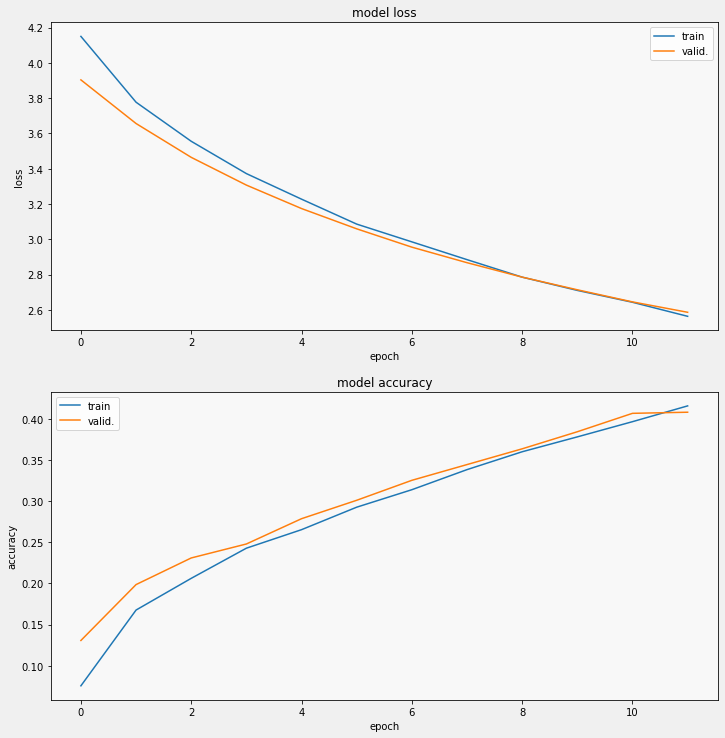

In [11]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss',
    211,
)
display_training_curves(
    history.history['sparse_categorical_accuracy'],
    history.history['val_sparse_categorical_accuracy'],
    'accuracy',
    212,
)

## Validation ##

Create a confusion matrix.

In [12]:
cmdataset = get_validation_dataset(ordered=True)
images_ds = cmdataset.map(lambda image, label: image)
labels_ds = cmdataset.map(lambda image, label: label).unbatch()

cm_correct_labels = next(iter(labels_ds.batch(NUM_VALIDATION_IMAGES))).numpy()
cm_probabilities = model.predict(images_ds)
cm_predictions = np.argmax(cm_probabilities, axis=-1)

labels = range(len(CLASSES))
cmat = confusion_matrix(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
)
cmat = (cmat.T / cmat.sum(axis=1)).T # normalize

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


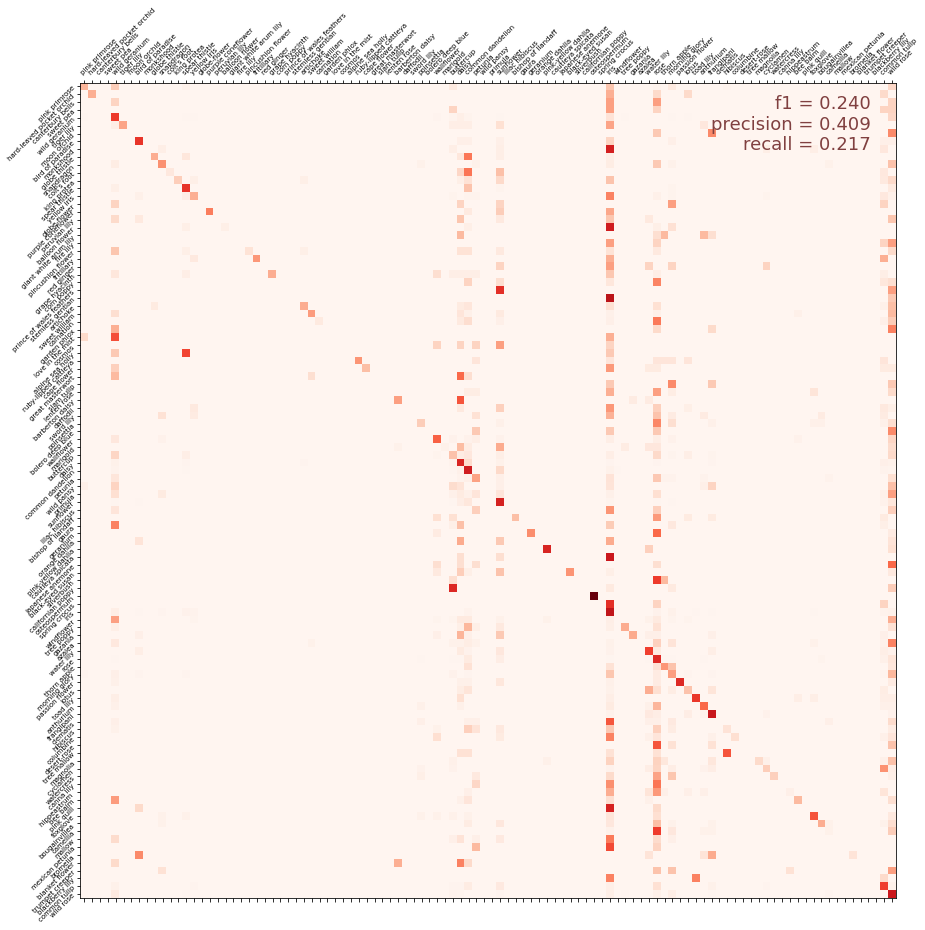

In [13]:
score = f1_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
precision = precision_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
recall = recall_score(
    cm_correct_labels,
    cm_predictions,
    labels=labels,
    average='macro',
)
display_confusion_matrix(cmat, score, precision, recall)

Look at examples from the dataset, with true and predicted classes.

In [14]:
dataset = get_validation_dataset()
dataset = dataset.unbatch().batch(20)
batch = iter(dataset)

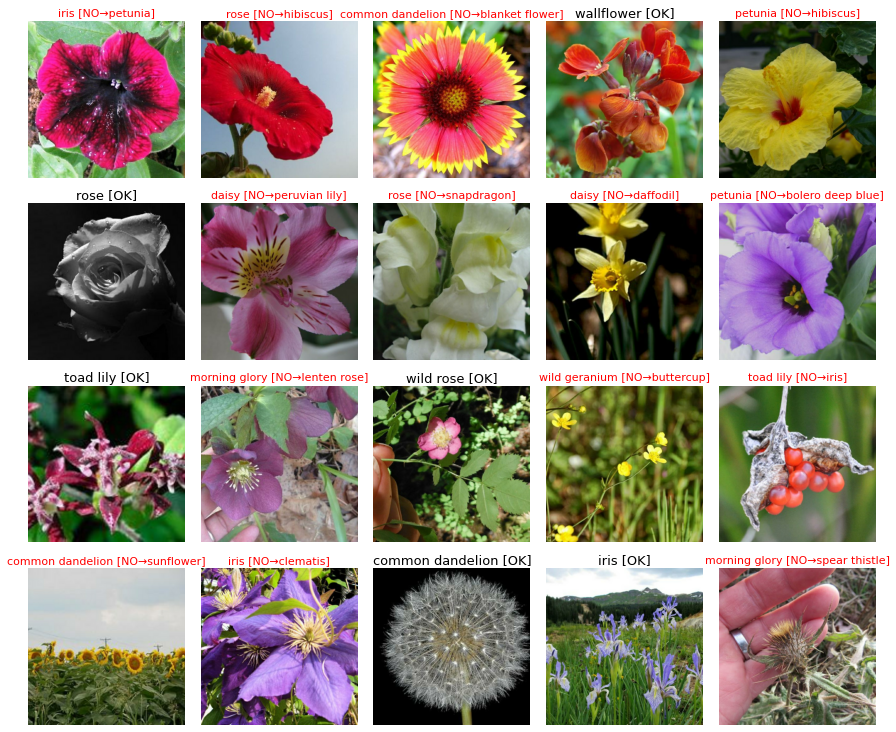

In [15]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)

## Test Predictions ##

Create predictions to submit to the competition.

In [16]:
test_ds = get_test_dataset(ordered=True)

print('Computing predictions...')
test_images_ds = test_ds.map(lambda image, idnum: image)
probabilities = model.predict(test_images_ds)
predictions = np.argmax(probabilities, axis=-1)
print(predictions)

Computing predictions...
[ 67  28 103 ...  48 102  53]


In [17]:
print('Generating submission.csv file...')

# Get image ids from test set and convert to integers
test_ids_ds = test_ds.map(lambda image, idnum: idnum).unbatch()
test_ids = next(iter(test_ids_ds.batch(NUM_TEST_IMAGES))).numpy().astype('U')

# Write the submission file
np.savetxt(
    'submission.csv',
    np.rec.fromarrays([test_ids, predictions]),
    fmt=['%s', '%d'],
    delimiter=',',
    header='id,label',
    comments='',
)

# Look at the first few predictions
!head submission.csv

Generating submission.csv file...
id,label
252d840db,67
1c4736dea,28
c37a6f3e9,103
00e4f514e,103
59d1b6146,53
8d808a07b,53
aeb67eefb,103
53cfc6586,48
aaa580243,67


# Going Further #

Now that you've joined the **Petals to the Metal** competition, why not try your hand at improving the model and see if you can climb the ranks! If you're looking for ideas, the *original* flower competition, [Flower Classification with TPUs](https://www.kaggle.com/c/flower-classification-with-tpus), has a wealth of information in its notebooks and discussion forum. Check it out!

---
**[Deep Learning Home Page](https://www.kaggle.com/learn/deep-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*